<a href="https://colab.research.google.com/github/beliaazzhr/CaseBased-1-Algoritma-Supervised/blob/main/Case_Based_1_1301200048.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Library yang digunakan


In [ ]:
#Import Dataset

!gdown --id 1yE9m8BYWNkv7tSGG8hVgiRL3zNBNZMb0

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yE9m8BYWNkv7tSGG8hVgiRL3zNBNZMb0
To: /content/arrhythmia_csv.csv
100% 413k/413k [00:00<00:00, 86.4MB/s]


In [ ]:
#import library

import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

##Menampilkan Data yang dipilih

In [ ]:
#menampilkan data

data = pd.read_csv('arrhythmia_csv.csv')
data

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, age to class
dtypes: float64(125), int64(155)
memory usage: 988.9 KB


In [ ]:
data.describe()

,age,sex,height,weight,QRSduration,PRinterval,Q-Tinterval,Tinterval,Pinterval,QRS,...,chV6_QwaveAmp,chV6_RwaveAmp,chV6_SwaveAmp,chV6_RPwaveAmp,chV6_SPwaveAmp,chV6_PwaveAmp,chV6_TwaveAmp,chV6_QRSA,chV6_QRSTA,class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


##Data Target

In [ ]:
target = data['class']
target

0       8
1       6
2      10
3       1
4       7
       ..
447     1
448    10
449     2
450     1
451     1
Name: class, Length: 452, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


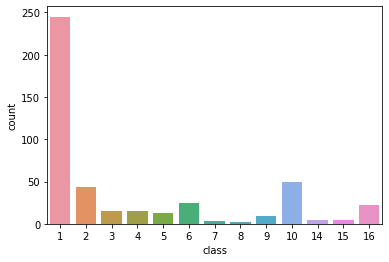

In [ ]:
sns.countplot(target, label = "Jumlah")

In [ ]:
target -= 1
target

0      7
1      5
2      9
3      0
4      6
      ..
447    0
448    9
449    1
450    0
451    0
Name: class, Length: 452, dtype: int64

In [ ]:
print(data)

     age  sex  height  weight  QRSduration  PRinterval  Q-Tinterval  \
0     75    0     190      80           91         193          371   
1     56    1     165      64           81         174          401   
2     54    0     172      95          138         163          386   
3     55    0     175      94          100         202          380   
4     75    0     190      80           88         181          360   
..   ...  ...     ...     ...          ...         ...          ...   
447   53    1     160      70           80         199          382   
448   37    0     190      85          100         137          361   
449   36    0     166      68          108         176          365   
450   32    1     155      55           93         106          386   
451   78    1     160      70           79         127          364   

     Tinterval  Pinterval  QRS  ...  chV6_QwaveAmp  chV6_RwaveAmp  \
0          174        121  -16  ...            0.0            9.0   
1        

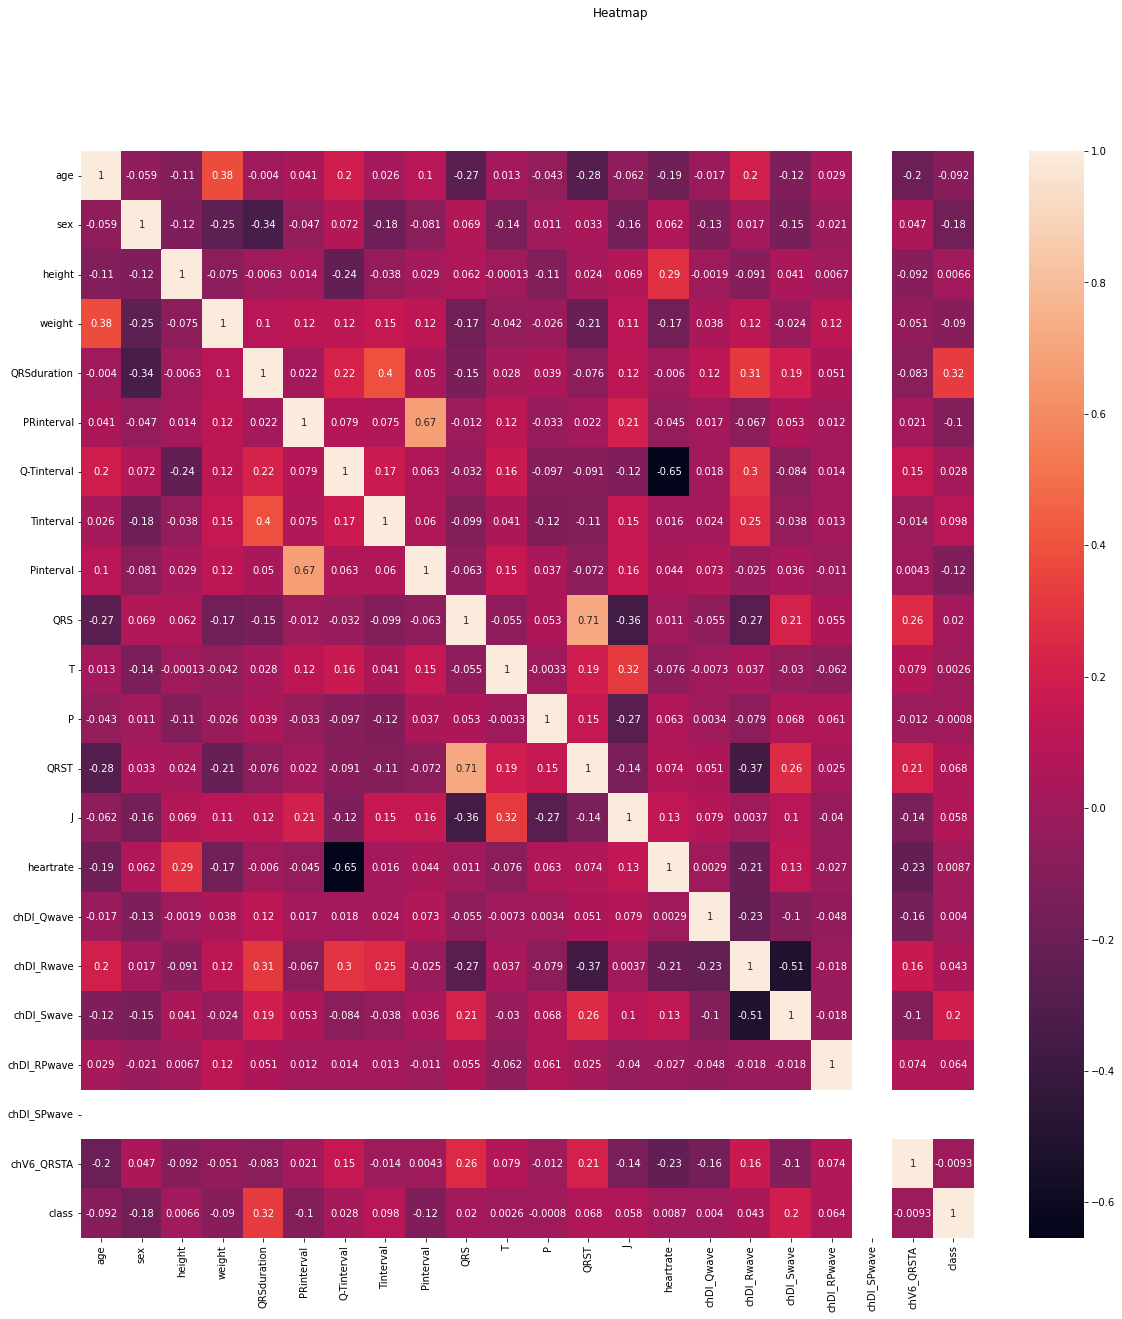

In [ ]:
#untuk menghapus kolom 20 ke bawah 

data.drop(data.columns[20:-2],axis=1, inplace=True)
data
#membuat heatmap/korelasi
corr = data.corr()
top_corr_features = corr.index
plt.figure(figsize = (20,20))
plt.suptitle("Heatmap")

#plot heat map
g = sns.heatmap(data[top_corr_features].corr(), annot=True)

##Info data

In [ ]:
#untuk menampilkan info data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          452 non-null    int64  
 1   sex          452 non-null    int64  
 2   height       452 non-null    int64  
 3   weight       452 non-null    int64  
 4   QRSduration  452 non-null    int64  
 5   PRinterval   452 non-null    int64  
 6   Q-Tinterval  452 non-null    int64  
 7   Tinterval    452 non-null    int64  
 8   Pinterval    452 non-null    int64  
 9   QRS          452 non-null    int64  
 10  T            444 non-null    float64
 11  P            430 non-null    float64
 12  QRST         451 non-null    float64
 13  J            76 non-null     float64
 14  heartrate    451 non-null    float64
 15  chDI_Qwave   452 non-null    int64  
 16  chDI_Rwave   452 non-null    int64  
 17  chDI_Swave   452 non-null    int64  
 18  chDI_RPwave  452 non-null    int64  
 19  chDI_SPw

##Menampilkan data null

In [ ]:
data.isna().sum()

age              0
sex              0
height           0
weight           0
QRSduration      0
PRinterval       0
Q-Tinterval      0
Tinterval        0
Pinterval        0
QRS              0
T                8
P               22
QRST             1
J              376
heartrate        1
chDI_Qwave       0
chDI_Rwave       0
chDI_Swave       0
chDI_RPwave      0
chDI_SPwave      0
chV6_QRSTA       0
class            0
dtype: int64

In [ ]:
#drop data yang bukan null

data['P'].fillna(data['P'].mean(), inplace = True)
data['T'].fillna(data['T'].mean(), inplace = True)
data['QRST'].fillna(data['QRST'].mean(), inplace = True)
data['heartrate'].fillna(data['heartrate'].mean(), inplace = True)

data.drop(columns=['J'], inplace=True)
data.drop(columns=['class'], inplace=True)
data.isna().sum()

age            0
sex            0
height         0
weight         0
QRSduration    0
PRinterval     0
Q-Tinterval    0
Tinterval      0
Pinterval      0
QRS            0
T              0
P              0
QRST           0
heartrate      0
chDI_Qwave     0
chDI_Rwave     0
chDI_Swave     0
chDI_RPwave    0
chDI_SPwave    0
chV6_QRSTA     0
dtype: int64

##Normalisasi Data

In [ ]:
#untuk menormalisasi data

from sklearn.preprocessing import MinMaxScaler
skala = MinMaxScaler()

In [ ]:
#normalisasi data

data = skala.fit_transform(data)
data

array([[0.90361446, 0.        , 0.12592593, ..., 0.        , 0.        ,
        0.56957929],
       [0.6746988 , 1.        , 0.08888889, ..., 0.        , 0.        ,
        0.50097087],
       [0.65060241, 0.        , 0.09925926, ..., 0.        , 0.        ,
        0.56699029],
       ...,
       [0.43373494, 0.        , 0.09037037, ..., 0.        , 0.        ,
        0.03495146],
       [0.38554217, 1.        , 0.07407407, ..., 0.        , 0.        ,
        0.55145631],
       [0.93975904, 1.        , 0.08148148, ..., 0.        , 0.        ,
        0.46213592]])

In [ ]:
x = data
y = target

##Penerapan Algoritma ANN

In [ ]:
#import train test split
from sklearn.model_selection import train_test_split

#Split data menjadi train set dan test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
#untuk mengisi input shape yang masih kosong 
x_train.shape

(361, 20)

In [ ]:

y_train.shape

(361,)

In [ ]:
y_train

24     0
17     0
66     1
301    0
356    2
      ..
106    5
270    0
348    4
435    0
102    0
Name: class, Length: 361, dtype: int64

In [ ]:
#implementasi metode ANN

buatModel = keras.Sequential([
    keras.layers.Dense(16, input_shape=(20,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(16, activation='softmax')
])
 
                    
optimizer = keras.optimizers.Adam(lr= 0.001)
buatModel.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
 
# Constructing the input
x = x_train
y = y_train

# training
training = buatModel.fit(x,y,epochs = 200,batch_size = 8)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


46/46 [==============================] - 1s 2ms/step - loss: 2.3062 - accuracy: 0.4737
Epoch 2/200
46/46 [==============================] - 0s 2ms/step - loss: 1.6805 - accuracy: 0.5568
Epoch 3/200
46/46 [==============================] - 0s 2ms/step - loss: 1.6230 - accuracy: 0.5568
Epoch 4/200
46/46 [==============================] - 0s 2ms/step - loss: 1.6086 - accuracy: 0.5568
Epoch 5/200
46/46 [==============================] - 0s 3ms/step - loss: 1.5773 - accuracy: 0.5568
Epoch 6/200
46/46 [==============================] - 0s 3ms/step - loss: 1.5590 - accuracy: 0.5568
Epoch 7/200
46/46 [==============================] - 0s 2ms/step - loss: 1.5418 - accuracy: 0.5568
Epoch 8/200
46/46 [==============================] - 0s 2ms/step - loss: 1.5228 - accuracy: 0.5623
Epoch 9/200
46/46 [==============================] - 0s 2ms/step - loss: 1.4938 - accuracy: 0.5679
Epoch 10/200
46/46 [==============================] - 0s 3ms/step - loss: 1.4916 - accuracy: 0.5762
Epoch 11/200
46/46 [=

In [ ]:
#data test
eval = buatModel.evaluate(x_test,y_test,batch_size = 800)

1/1 [==============================] - 0s 185ms/step - loss: 2.3799 - accuracy: 0.5165


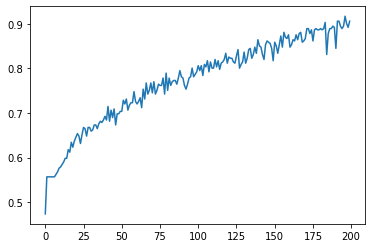

In [ ]:
#grafik untuk menampilkan akurasi
#apabila nilai epoch semakin tinggi maka nilai akurasi semakin tinggi

plt.plot(training.history['accuracy'], linestyle = 'solid')
plt.show()

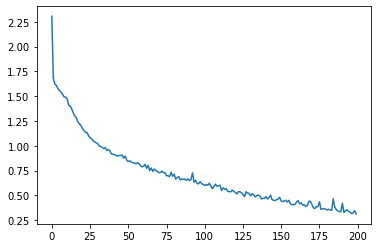

In [ ]:
#selisih dari output yang didapet sama model dan output asli nya (selisih dari prediksi dan aslinya)
#kalo loss kecil selisih antara output yang diprediksi sama output aslinya itu semakin dekat jadi semakin bagus

plt.plot(training.history['loss'], linestyle = 'solid')
plt.show()

In [ ]:
b, s = 0, 0
prediksi = buatModel.predict(x_test)
for p, y in zip(prediksi, y_test):
  pr = np.argmax(p)
  print("Prediksi:", pr, "Y Test:", y)
  if(pr == y) :
    b = b + 1
  else :
    s = s + 1

print("Benar:", b)
print("Salah:", s)
akur = b/(b+s)*100
print("Akurasi:", akur)

3/3 [==============================] - 0s 5ms/step
Prediksi: 0 Y Test: 0
Prediksi: 0 Y Test: 5
Prediksi: 0 Y Test: 9
Prediksi: 0 Y Test: 15
Prediksi: 5 Y Test: 5
Prediksi: 9 Y Test: 0
Prediksi: 0 Y Test: 0
Prediksi: 0 Y Test: 0
Prediksi: 3 Y Test: 2
Prediksi: 1 Y Test: 5
Prediksi: 0 Y Test: 0
Prediksi: 15 Y Test: 0
Prediksi: 0 Y Test: 0
Prediksi: 8 Y Test: 8
Prediksi: 0 Y Test: 0
Prediksi: 0 Y Test: 5
Prediksi: 15 Y Test: 13
Prediksi: 0 Y Test: 15
Prediksi: 0 Y Test: 0
Prediksi: 0 Y Test: 1
Prediksi: 1 Y Test: 1
Prediksi: 0 Y Test: 0
Prediksi: 0 Y Test: 3
Prediksi: 9 Y Test: 0
Prediksi: 0 Y Test: 2
Prediksi: 3 Y Test: 2
Prediksi: 3 Y Test: 0
Prediksi: 0 Y Test: 0
Prediksi: 0 Y Test: 9
Prediksi: 0 Y Test: 15
Prediksi: 4 Y Test: 9
Prediksi: 1 Y Test: 1
Prediksi: 2 Y Test: 9
Prediksi: 0 Y Test: 0
Prediksi: 0 Y Test: 0
Prediksi: 2 Y Test: 2
Prediksi: 0 Y Test: 9
Prediksi: 0 Y Test: 0
Prediksi: 0 Y Test: 0
Prediksi: 0 Y Test: 0
Prediksi: 2 Y Test: 9
Prediksi: 0 Y Test: 0
Prediksi: 5 Y Test: